In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)

In [ ]:
df.head()

In [ ]:
col_name = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [ ]:
df.columns = col_name

In [ ]:
df.head()

# Exploatory Data Analysis (EDA)

In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.pairplot(df, size = 1.5);
plt.show()

In [ ]:
col_study = ["ZN", "INDUS", "NOX", "RM"]

In [ ]:
sns.pairplot(df[col_study], size = 2.5);
plt.show()

In [ ]:
col_study = ["PTRATIO", "B", "LSTAT", "MEDV"]

In [ ]:
sns.pairplot(df[col_study], size = 2.5);
plt.show()

# Correlation Analysis and Feature Selection

In [ ]:
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df[["CRIM", "ZN", "INDUS", "CHAS", "MEDV"]].corr(), annot=True)
plt.show()

# Linear Regression with Scikit-Learn

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)
col_name = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.columns = col_name

In [ ]:
X = df["RM"].values.reshape(-1, 1)

In [ ]:
y = df["MEDV"].values

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
plt.figure(figsize=(12, 10));
sns.regplot(X, y);
plt.xlabel("average number of roooms per dewlling")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

In [ ]:
sns.jointplot(x = "RM", y = "MEDV", data = df, kind = "reg", size = 10);
plt.show();

In [ ]:
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values
model.fit(X, y)
plt.figure(figsize = (12, 10));
sns.regplot(X, y)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

# Robust Regression


## RANdom SAmple Concensus (RANSAC) Algorithm
link = http://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html

In [ ]:
import numpy as np
from sklearn.linear_model import RANSACRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)
col_name = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.columns = col_name

In [ ]:
X = df["RM"].values.reshape(-1, 1)
y = df["MEDV"].values

In [ ]:
ransac = RANSACRegressor()

In [ ]:
ransac.fit(X, y)

In [ ]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [ ]:
np.arange(3, 10, 1)

In [ ]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

In [ ]:
sns.set(style="darkgrid", context = "notebook")
plt.figure(figsize=(12, 10))
plt.scatter( X[inlier_mask], y[inlier_mask], c = "blue", marker = "o", label = "Inliers")
plt.scatter( X[outlier_mask], y[outlier_mask], c = "brown", marker = "s", label = "Outliers")
plt.plot(line_X, line_y_ransac, color = "red")
plt.xlabel("average number of roooms per dewlling")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
ransac.estimator_.coef_

In [ ]:
ransac.estimator_.intercept_

# Performance Evaluation of Regression Model

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)
col_name = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.columns = col_name

In [ ]:
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)

In [ ]:
len(y_train_pred)

In [ ]:
len(y_train)

# Method 1: Residual Analysis

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "orange", marker = "*", label = "Test data")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0,  xmin = -10, xmax = 50, lw =2 , color ="k")
plt.xlim([-10, 50])
plt.show()

# Method 2: Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

# Method 3: Coefficient of Determination

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train, y_train_pred)

In [ ]:
r2_score(y_test, y_test_pred)

# What does a Near Perfect Model Looks like?

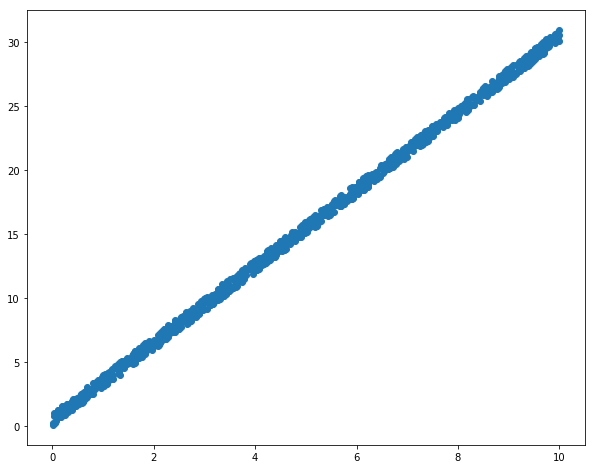

In [4]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.rand(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)

y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred  = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

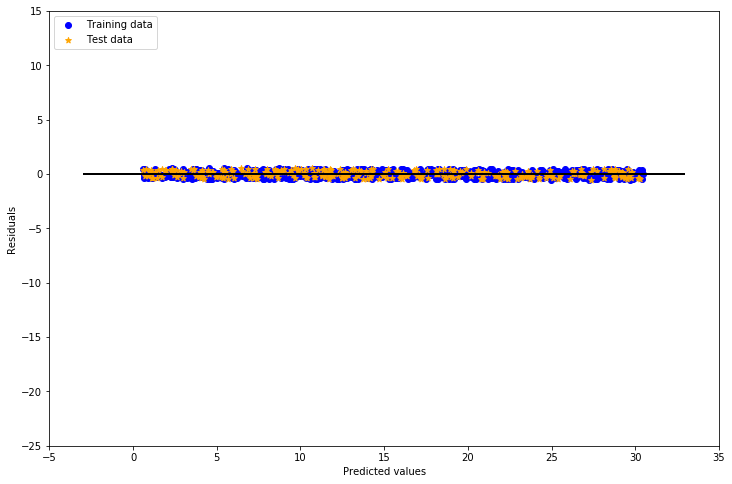

In [18]:
plt.figure(figsize = (12, 8))
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "orange", marker = "*", label = "Test data")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0,  xmin = -3, xmax = 33, lw =2 , color ="k")
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

# Method 2: MSE

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

0.08449469767
0.0892967024719


# Method 3: Coefficient of Determination

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_train, y_train_pred)

0.9988743405397692

In [14]:
r2_score(y_test, y_test_pred)

0.99884142213577898